In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_train=(x_train/255).astype('float32')
x_test=(x_test/255).astype('float32')

In [7]:
x_train=x_train[...,None]
x_test=x_test[...,None]

In [8]:
model=keras.Sequential([
    layers.Input(shape=x_train.shape[1:]),
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1,0.1),

    layers.Conv2D(32,(3,3),padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(32,(3,3),padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(),

    layers.Conv2D(64,(3,3),padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(64,(3,3),padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(),

    layers.Conv2D(128,(3,3),padding='valid'),
    layers.BatchNormalization(),
    layers.ReLU(),

    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10,activation='softmax')
])





In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
early_stopping=keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [11]:
checkpoint=keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath='best_mnist_mdoel.h5',
    save_best_only=True,
    mode='min'
)

In [12]:
history=model.fit(
    x_train,y_train,
    epochs=30,
    validation_split=0.1,
    batch_size=128,
    callbacks=[early_stopping]
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8108 - loss: 0.5922 - val_accuracy: 0.1250 - val_loss: 7.4945
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9653 - loss: 0.1145 - val_accuracy: 0.9833 - val_loss: 0.0560
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9740 - loss: 0.0909 - val_accuracy: 0.9465 - val_loss: 0.1916
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9794 - loss: 0.0699 - val_accuracy: 0.9910 - val_loss: 0.0349
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9789 - loss: 0.0694 - val_accuracy: 0.9898 - val_loss: 0.0360
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9809 - loss: 0.0600 - val_accuracy: 0.9882 - val_loss: 0.0392
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9827 - loss: 0.0569 - val_accuracy: 0.9870 - val_loss: 0.0428


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0347
Test accuracy: 0.9901


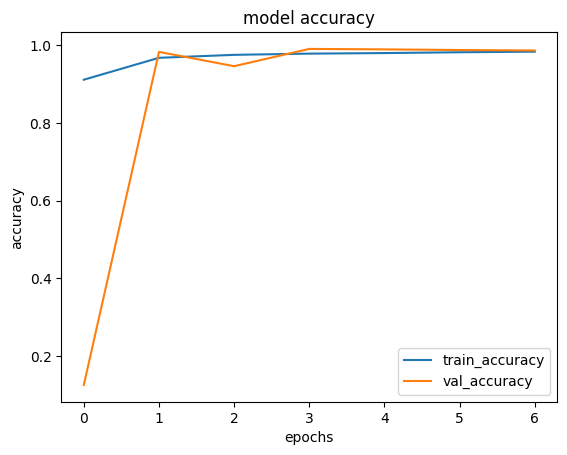

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

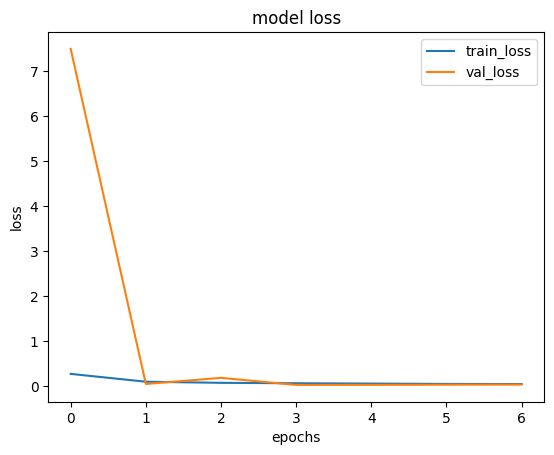

In [15]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()